In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Statistical Analysis of Pokemon Showdown - Jacob Hornung - [Website](https://jhornung1.github.io)
The goal for this project is to analyze the community and usage rate of Pokemon in competetive Pokemon singles. All of my data comes from a single source, but it is in incredibly extensive source, and that is the Smogon usage rates stats page. There is an incredible amount of data here, which should contain everything that I would need. I will also use a  seperate full list of the Pokemon in order to compare typing, stats, and abilities of all the pokemon that are being used.


### Collaboration Plan
As far as I am aware, for my project a collaboration plan is not needed as I am doing this by myself and only have to collaborate with myself.

In [ ]:
P2024_09_ou_1500 = pd.read_csv('https://www.smogon.com/stats/2024-09/gen9ou-1500.txt', delimiter='|', skiprows={0,1,2,4}, skipfooter=1, engine='python')
P2024_09_ou_1500 = P2024_09_ou_1500.drop(columns=[' ', ' .1']) # Drops the nan columns that are generated
P2024_09_ou_1500.columns = ['Rank', 'Pokemon', 'Usage %', 'RAW', 'RAW %', 'REAL', 'REAL %'] # Renames columns into an easier to read and clean dataset

P2024_09_ou_1500.head()

,Rank,Pokemon,Usage %,RAW,RAW %,REAL,REAL %
0,1,Great Tusk,30.94066%,563847,25.783%,438832,25.652%
1,2,Kingambit,22.32297%,417612,19.096%,275574,16.109%
2,3,Gholdengo,20.53057%,391079,17.883%,296858,17.353%
3,4,Dragapult,17.24182%,361860,16.547%,278739,16.294%
4,5,Iron Valiant,16.70787%,311532,14.245%,222736,13.020%


## Table 1:
This first table will mainly serve as an introduction to the data that I will be looking at, and come from the 2024 useage rate statistics for Q3 in the 1500s ELO on Showdown. Let's start backwards in explaining what that means. Showdown is a battle simulator for Pokemon which has a huge variety in the ways you can play and the different "metagames" you can play. The most popular of these metagames is 6v6 singles (meaning 6 Pokemon on each team, and it's only one Pokemon on the field at a time). We can then pick a specific metagame being Overused, or OU, which is the main metagame that most singles players play. If you are familiar with zero sum games like Chess or Esports you might also know what ELO is, but a simplified explanation of ELO is a points system where you gain points by winning games and lose points by losing games. On Showdown, the minimum amount of ELO you can have is 1000, and there is no theoretical max, but it is almost impossible to get above 2200 ELO. This data is looking at Q3 useage statistics, meaning ONLY the data from the start of July to the end of August. Finally, useage statistics calculates how many times each Pokemon is brought to a battle, or how much each Pokemon is used.

This table is an example of what I am able to do with this data and what insights I can gain into the competetive scene of Pokemon. There is data in this website going all the way back to 2014 and using this, I want to see the developments in the meta game, see the evolution of certain Pokemon and how they have changed, determine the statistically best and maybe underrated Pokemon, and try to determine correlations between completely different metagames (like similarities between Generation 5 PU and Generation 8 OU). This data is all from a completely trusted source as the data is taken directly from the Pokemon Showdown (the battle simulator) application, and simply put onto the Smogon (the competetive Pokemon community). Because this data was not designed or taken from a single source, bias should be completely minimal and the data will accuratetly refelect the specific metagames at the time of capture.


In [ ]:
P2024_09_ou_1500.head(5)

,Rank,Pokemon,Usage %,RAW,RAW %,REAL,REAL %
0,1,Great Tusk,30.94066%,563847,25.783%,438832,25.652%
1,2,Kingambit,22.32297%,417612,19.096%,275574,16.109%
2,3,Gholdengo,20.53057%,391079,17.883%,296858,17.353%
3,4,Dragapult,17.24182%,361860,16.547%,278739,16.294%
4,5,Iron Valiant,16.70787%,311532,14.245%,222736,13.020%


This data set ranks Pokemon by usage, and the Usage % column is a weighted measurement that uses the ELO of each player to determine the weight of the statistic (ie, a better player using Great Tusk contributes more than a worse player). For example, Zamazenta has 14.59525% useage rate, which means that 14.6% of players brought Zamazenta on their team of 6. Next is the RAW which is the number of games that the Pokemon was brought to, and RAW % is the percentage of total games the Pokemon was brought to. Finally, REAL is the amount of games the Pokemon was actually used in (you can bring a Pokemon and not use it), and REAL % is the percentage of games the Pokemon  was used.

In [ ]:
P2024_09_ou_1500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Rank     761 non-null    int64 
 1   Pokemon  761 non-null    object
 2   Usage %  761 non-null    object
 3   RAW      761 non-null    int64 
 4   RAW %    761 non-null    object
 5   REAL     761 non-null    int64 
 6   REAL %   761 non-null    object
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


Now we see a problem in the datatypes for the DataFrame, being that the percents are seen as object types, because each value has a % sign at the end of the number. To get every value into decimal form (as they are all fractions/percentages/decimals) we then divide each changed number by 100. Finally, we manually flag each value as a float, so the value stops being a string.

In [ ]:
for column in ['Usage %', 'RAW %', 'REAL %']:
  P2024_09_ou_1500[column] = P2024_09_ou_1500[column].astype(str).str.replace('%', '') # Replaces the % sign with nothing, ie. removing it
  P2024_09_ou_1500[column] = P2024_09_ou_1500[column].astype(float) / 100 # changes the type of each to a float

P2024_09_ou_1500.head()

,Rank,Pokemon,Usage %,RAW,RAW %,REAL,REAL %
0,1,Great Tusk,0.309407,563847,0.25783,438832,0.25652
1,2,Kingambit,0.223230,417612,0.19096,275574,0.16109
2,3,Gholdengo,0.205306,391079,0.17883,296858,0.17353
3,4,Dragapult,0.172418,361860,0.16547,278739,0.16294
4,5,Iron Valiant,0.167079,311532,0.14245,222736,0.13020


Now that we know it worked, we need to make sure that the types in the DataFrame are actually changed. We do this by running the info function, and we then see the types have automatically changed into float64 (meaning we don't have to manually change them).

In [ ]:
P2024_09_ou_1500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     761 non-null    int64  
 1   Pokemon  761 non-null    object 
 2   Usage %  761 non-null    float64
 3   RAW      761 non-null    int64  
 4   RAW %    761 non-null    float64
 5   REAL     761 non-null    int64  
 6   REAL %   761 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 41.7+ KB


___

With this specific data set, I want to compare it to the entire history of Generation 9 Overused and determine which Pokemon create centralization, and determine trends of checks and counters. For example, I know that Great Tusk rapidly rose in popularity last year, which caused other Pokemon to drop in popularity, and I want to be able to graph that trend.

## Table 2, 3 and 2/3:
This next data set is very similar to the previous set, but this listing all the lead Pokemon (the first Pokemon you send out in battle), but this set is for Generation 4 Overused, a metagame that has a lot more emphasis on the importance of the lead matchup. This table obviously doesn't have the REAL column, because if you lead with a specific Pokemon, obviously you have used that Pokemon in the battle.

In [ ]:
P2024_09_leads_gen4ou_1500 = pd.read_csv('https://www.smogon.com/stats/2024-09/leads/gen4ou-1500.txt', delimiter='|', skiprows={0,1,3}, skipfooter=1, engine='python')
P2024_09_leads_gen4ou_1500 = P2024_09_leads_gen4ou_1500.drop(columns=[' ',' .1']) # Drops the nan columns that are generated
P2024_09_leads_gen4ou_1500.columns = ['Rank', 'Pokemon', 'Usage %', 'RAW', 'RAW %'] # Renames columns into an easier to read and clean dataset

P2024_09_leads_gen4ou_1500.head()

,Rank,Pokemon,Usage %,RAW,RAW %
0,1,Azelf,11.54871%,14211,10.074%
1,2,Metagross,6.53982%,8578,6.081%
2,3,Jirachi,6.53836%,7114,5.043%
3,4,Aerodactyl,6.11988%,9187,6.512%
4,5,Skarmory,5.25107%,7037,4.988%


We can then convert the percentage values into the correct float64 values the same way we did with the gen9ou usage rates dataset.

In [ ]:
for column in ['Usage %', 'RAW %']:
  P2024_09_leads_gen4ou_1500[column] = P2024_09_leads_gen4ou_1500[column].astype(str).str.replace('%', '') # Replaces the % sign with nothing, ie. removing it
  P2024_09_leads_gen4ou_1500[column] = P2024_09_leads_gen4ou_1500[column].astype(float) / 100 # changes the type of each to a float

P2024_09_leads_gen4ou_1500.head()

,Rank,Pokemon,Usage %,RAW,RAW %
0,1,Azelf,0.115487,14211,0.10074
1,2,Metagross,0.065398,8578,0.06081
2,3,Jirachi,0.065384,7114,0.05043
3,4,Aerodactyl,0.061199,9187,0.06512
4,5,Skarmory,0.052511,7037,0.04988


Now what I want to do is take the usage rates from this quarter, and then do a DataFrame merge so I can rank the Pokemon used by their general use percentage, but also have their lead percentage with them so I can eventually compare that to previous years and possibly see an evolution of leading percentages from the years since 2014!

In [ ]:
P2024_09_gen4ou_1500 = pd.read_csv('https://www.smogon.com/stats/2024-09/gen4ou-1500.txt', delimiter='|', skiprows={0,1,2,4}, skipfooter=1, engine='python')
P2024_09_gen4ou_1500 = P2024_09_gen4ou_1500.drop(columns=[' ',' .1']) # Drops the nan columns that are generated
P2024_09_gen4ou_1500.columns = ['Rank', 'Pokemon', 'Usage %', 'RAW', 'RAW %', 'REAL', 'REAL %'] # Renames columns into an easier to read and clean dataset

# Converting the DTypes
for column in ['Usage %', 'RAW %', 'REAL %']:
  P2024_09_gen4ou_1500[column] = P2024_09_gen4ou_1500[column].astype(str).str.replace('%', '') # Replaces the % sign with nothing, ie. removing it
  P2024_09_gen4ou_1500[column] = P2024_09_gen4ou_1500[column].astype(float) / 100 # changes the type of each to a float

P2024_09_gen4ou_1500.head()

,Rank,Pokemon,Usage %,RAW,RAW %,REAL,REAL %
0,1,Tyranitar,0.461696,56752,0.40230,45914,0.39455
1,2,Jirachi,0.331216,38704,0.27436,32022,0.27517
2,3,Latias,0.322396,38138,0.27035,30074,0.25843
3,4,Heatran,0.282187,34328,0.24334,28710,0.24671
4,5,Gyarados,0.261262,33908,0.24036,28443,0.24442


Now we merge the two DataFrames and change the name of the lead columns to specify that they are the lead statistics.

In [ ]:
merged_df = pd.merge(P2024_09_gen4ou_1500, P2024_09_leads_gen4ou_1500, on='Pokemon', how='left', suffixes=('', ' Lead')) # This does a left merge as we want to combine and then add the new values
merged_df = merged_df.rename(columns={'Usage %_Lead': 'Lead Usage %', 'RAW_Lead': 'Lead RAW', 'RAW %_Lead': 'Lead RAW %'}) # This just changes the names of the columns

merged_df.head()

,Rank,Pokemon,Usage %,RAW,RAW %,REAL,REAL %,Rank Lead,Usage % Lead,RAW Lead,RAW % Lead
0,1,Tyranitar,0.461696,56752,0.40230,45914,0.39455,8.0,0.040196,5246.0,0.03719
1,2,Jirachi,0.331216,38704,0.27436,32022,0.27517,3.0,0.065384,7114.0,0.05043
2,3,Latias,0.322396,38138,0.27035,30074,0.25843,21.0,0.011536,1324.0,0.00939
3,4,Heatran,0.282187,34328,0.24334,28710,0.24671,15.0,0.026204,3132.0,0.02220
4,5,Gyarados,0.261262,33908,0.24036,28443,0.24442,19.0,0.015090,1990.0,0.01411


Now I want to look at Azelf, as Azelf is the number one lead Pokemon in gen 4 at the moment, and I want to see how much it is used in the metagame as a whole. This is done using the loc function.

In [ ]:
merged_df.loc[merged_df['Pokemon'] == 'Azelf']

,Rank,Pokemon,Usage %,RAW,RAW %,REAL,REAL %,Rank Lead,Usage % Lead,RAW Lead,RAW % Lead


We now see that there was a problem, and it seems like our code isn't able to find Azelf in the Pokemon series. After some troubleshooting, I learned that the column has whitespace, which then needed to be removed using the string strip() function (which removes the whitespace).

In [ ]:
merged_df['Pokemon'] = merged_df['Pokemon'].str.strip()

merged_df.loc[merged_df['Pokemon'] == 'Azelf']

,Rank,Pokemon,Usage %,RAW,RAW %,REAL,REAL %,Rank Lead,Usage % Lead,RAW Lead,RAW % Lead
16,17,Azelf,0.136885,17220,0.12207,16580,0.14247,1.0,0.115487,14211.0,0.10074


Looking at this Azelf data we see that it is used roughly 13.6% of the time, but it also has a 11.5% lead percentage. This tells us that there is only 2.1% of times where Azelf is brought into a match, but is not used as the lead Pokemon. I find this incredibly interesting as the most used lead Pokemon, is basically only usedas a lead Pokemon.

Finally, we create a graph. A very simple graph idea is simply showing the useage rates for each pokemon on a bar graph, which is what I chose to show. The graph beneath this shows

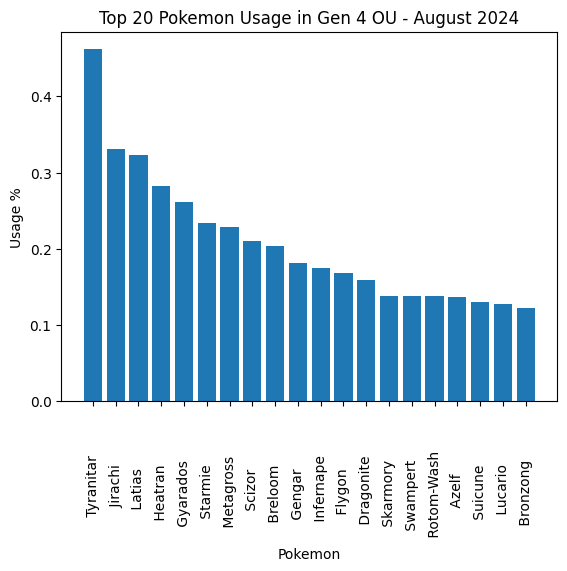

In [ ]:
plt.bar(P2024_09_gen4ou_1500['Pokemon'].head(20), P2024_09_gen4ou_1500['Usage %'].head(20))
plt.xticks(rotation=90)
plt.xlabel('Pokemon')
plt.ylabel('Usage %')
plt.title('Top 20 Pokemon Usage in Gen 4 OU - August 2024')
plt.show()

The main thing this graph shows is something I had an idea of, but didn't fully comprehend until now. Tyranitar has almost 50% useage rate, and the next closer barely has 30%. That stat is insane to me and is one of many things I wish to discover through this project.

___
## Closing Thoughts and Final Goals:
The main thing I have always wanted to do with Pokemon is creating a master program that can tell me the useage rate of every Pokemon over time, what metagames they are used in, and all the possible data I could ever want. I don't think I will be able to accopmlish this over this course (the scope excedes the ideas of Data Science), but this will help me to get started.

Some primary questions that I want to answer are "Which typing is historically the best?", "Is Stall really as prevelant as people say it is?", "Has Tyranitar actually fallen off?" and "Is there a direct link to tournament results and useage rates?" That last question is the most interesting to me, because you would assume when a Pokemon has an incredible tournament run it would be used more in casual play, but not everybody keeps up to date with the Smogon tournaments.

I have data from up to 10 years ago, and I think I might be able to find data from before that (useage rates from 2010!), but that requires me getting in touch with some older players that have stopped playing, so I might not be able to get that older data. The end goal for this project is making a master list of comparisons over time and the changes that different generations not only bring to modern Pokemon, but also older Pokemon.

In [51]:
%%shell
!jupyter nbconvert --to html /content/jacob_milestone1 (1).ipynb

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `!jupyter nbconvert --to html /content/jacob_milestone1 (1).ipynb'


CalledProcessError: Command '!jupyter nbconvert --to html /content/jacob_milestone1 (1).ipynb
' returned non-zero exit status 2.